<a href="https://colab.research.google.com/github/Nzaya/Mchezopesa-Ltd/blob/master/Moringa_Data_Science_Core_W6_Independent_Project_2019_06_Sharon_Nzaya_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # QUESTION
  
  
  You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A Prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

# METRICS OF SUCCESS

# CONTEXT

# EXPERIMENTAL DESIGN TAKEN

# Importing necessary libraries

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.gridspec as gridspec
from numpy import random
import scipy.stats as scipy

from IPython.display import display

from sklearn.metrics import accuracy_score


# Loading our dataset

In [0]:
#Loading our ranking dataset

ranking=pd.read_csv('/content/fifa_ranking.csv')
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [0]:
#Loading our results dataset

results=pd.read_csv('/content/results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## EXPLORATORY DATA ANALYSIS

I am only going to use the information from Country, Rank, City, Home Team, Away Team, Home Score,Away Score, Confederation, Neutral and Tournament for the EDA.

This are the information which would be useful to understand the game.

In [0]:
#Creating a new ranking dataFrame

df=ranking[['rank','country_full','confederation','rank_date']]
df.head()

,rank,country_full,confederation,rank_date
0,1,Germany,UEFA,1993-08-08
1,2,Italy,UEFA,1993-08-08
2,3,Switzerland,UEFA,1993-08-08
3,4,Sweden,UEFA,1993-08-08
4,5,Argentina,CONMEBOL,1993-08-08


In [0]:
#creating a new result dataframe

df1=results[['home_team','away_team','home_score','away_score','tournament','city','country','neutral','date']]
df1.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872-11-30
1,England,Scotland,4,2,Friendly,London,England,False,1873-03-08
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874-03-07
3,England,Scotland,2,2,Friendly,London,England,False,1875-03-06
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876-03-04


In [0]:
#Merging the two new dataframe

merged=df.merge(df1,left_on='country_full',right_on='country')
merged.head()

,rank,country_full,confederation,rank_date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date
0,1,Germany,UEFA,1993-08-08,Germany,Switzerland,1,0,Friendly,Karlsruhe,Germany,False,1909-04-04
1,1,Germany,UEFA,1993-08-08,Germany,Belgium,0,3,Friendly,Duisburg,Germany,False,1910-05-16
2,1,Germany,UEFA,1993-08-08,Germany,Netherlands,1,2,Friendly,Kleve,Germany,False,1910-10-16
3,1,Germany,UEFA,1993-08-08,Germany,Switzerland,6,2,Friendly,Stuttgart,Germany,False,1911-03-26
4,1,Germany,UEFA,1993-08-08,Germany,Austria,1,2,Friendly,Dresden,Germany,False,1911-10-09


In [0]:
#creating a new column called results that is computed by the home score - the away score

merged['result'] = merged['home_score'] - merged['away_score']
      

In [0]:
#creating a function for the win ,loss and draw

def result(x):
  if x >0:
    return 'win'
  elif x<0:
    return 'loss'
  else:
    return 'draw'

In [0]:
#Implementing and applying our function

merged['results']=merged.result.apply(lambda x: result(x))

In [0]:
#previewing  the new dataset

merged.head()

,rank,country_full,confederation,rank_date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date,result,results
0,1,Germany,UEFA,1993-08-08,Germany,Switzerland,1,0,Friendly,Karlsruhe,Germany,False,1909-04-04,1,win
1,1,Germany,UEFA,1993-08-08,Germany,Belgium,0,3,Friendly,Duisburg,Germany,False,1910-05-16,-3,loss
2,1,Germany,UEFA,1993-08-08,Germany,Netherlands,1,2,Friendly,Kleve,Germany,False,1910-10-16,-1,loss
3,1,Germany,UEFA,1993-08-08,Germany,Switzerland,6,2,Friendly,Stuttgart,Germany,False,1911-03-26,4,win
4,1,Germany,UEFA,1993-08-08,Germany,Austria,1,2,Friendly,Dresden,Germany,False,1911-10-09,-1,loss


# Univariate Analysis

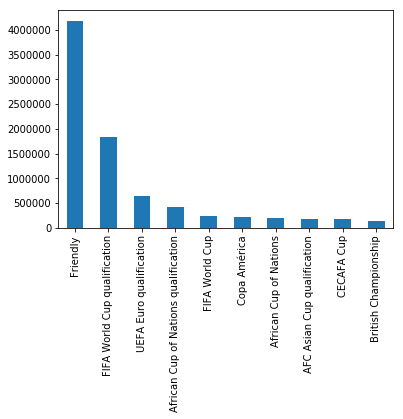

In [0]:
#Plotting a bar graph of tournament

merged['tournament'].value_counts().head(10).plot.bar()

From the bar graph above we can see that majority of the games played were friendly

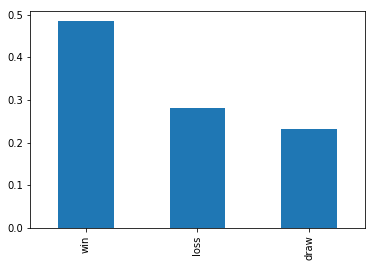

In [0]:
#Plotting a bar graph for the results

(merged['results'].value_counts().head(10)/len(merged)).plot.bar()

From the bar graph above we can see that majority of the games were won 

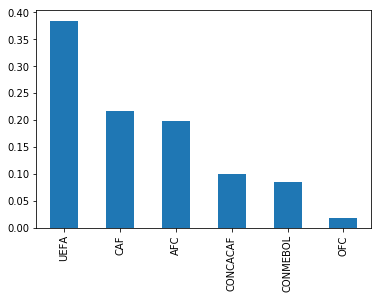

In [0]:
#plotting a bar graph for the confederation

(merged['confederation'].value_counts().head(10)/len(merged)).plot.bar()

From the above we can see that UEFA organized majority of the matches while OFC organized the least

# Selecting Countries of Interest

First we will to select the countries of interest for our analysis.
I am selecting England, Germany and Spain as these are the most popular and most watched leagues in football. These leagues are the most competitive league and it would give better understanding of the game

In [0]:
#Selecting the main countries

main_countries = ['England','Germany','Spain']
soccer = merged[merged.country_full.isin(main_countries)]
                          

# Merge the leagues with their corresponding matches

In [0]:
#Previewing the soccer dataset at the top

soccer.head()

,rank,country_full,confederation,rank_date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date,result,results
0,1,Germany,UEFA,1993-08-08,Germany,Switzerland,1,0,Friendly,Karlsruhe,Germany,False,1909-04-04,1,win
1,1,Germany,UEFA,1993-08-08,Germany,Belgium,0,3,Friendly,Duisburg,Germany,False,1910-05-16,-3,loss
2,1,Germany,UEFA,1993-08-08,Germany,Netherlands,1,2,Friendly,Kleve,Germany,False,1910-10-16,-1,loss
3,1,Germany,UEFA,1993-08-08,Germany,Switzerland,6,2,Friendly,Stuttgart,Germany,False,1911-03-26,4,win
4,1,Germany,UEFA,1993-08-08,Germany,Austria,1,2,Friendly,Dresden,Germany,False,1911-10-09,-1,loss


In [0]:
#Previewing the soccer dataset at the bottom

soccer.tail()

,rank,country_full,confederation,rank_date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date,result,results
1843837,10,Spain,UEFA,2018-06-07,Spain,Bosnia and Herzegovina,1,0,Friendly,Las Palmas,Spain,False,2018-11-18,1,win
1843838,10,Spain,UEFA,2018-06-07,Argentina,Venezuela,1,3,Friendly,Madrid,Spain,True,2019-03-22,-2,loss
1843839,10,Spain,UEFA,2018-06-07,Spain,Norway,2,1,UEFA Euro qualification,Valencia,Spain,False,2019-03-23,1,win
1843840,10,Spain,UEFA,2018-06-07,DR Congo,Burkina Faso,0,0,Friendly,Marbella,Spain,True,2019-06-09,0,draw
1843841,10,Spain,UEFA,2018-06-07,Spain,Sweden,3,0,UEFA Euro qualification,Madrid,Spain,False,2019-06-10,3,win


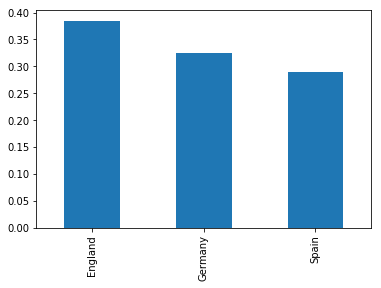

In [0]:
#Find the highest and the lowest country

(soccer['country_full'].value_counts().head(10)/len(soccer)).plot.bar()

# LOGISTIC REGRESSION

I used different algorithms, Logistic regression and Random Forest, Gaussian NB and KNN to train the models and predict the outcome.
Then I defined a pipeline to optimize parameters of models 

In [0]:
#Previewing our dataset

soccer.head()

In [0]:
#Lets check the percantage of home win , away win and draw 

plt.figure(figsize=(6,8))
plt.pie(soccer['results'].value_counts(),labels=['Home','Away','Draw'], autopct='%1.1f%%',shadow=True, startangle=0)
plt.axis('equal')
plt.title('Win Percentage', size=18)
plt.show()

Making features for our model (As an obvious fact we do not know the results for the game that we are predicting! so we need to make some features based on the previous results for every match):

1)Taking the average of previous games different features for every team and considering as a new feature for our model (For example England played and scored, therefore we take this average (2 goals per game) and consider it as new feature)

2)I also defined a momentum which gives the average of five previous games for each team. It could be helpful to make our model more accurately. If for example some team in the five previous games shows poor results or great results, we can track them.

 We split the dataset into training(90%) and test (10%) sets. I use the test dataset only for the final prediction.

In [0]:

# Importing different classification models
#
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Creating a list of classifier algorithms to compare with
#
models = [RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), DecisionTreeClassifier(), XGBClassifier(), SVC(), KNeighborsClassifier(),\
         GaussianNB(), LogisticRegression()]

In [0]:
# Creating lists of the algorithms, to store the accuracy scores of each fold
#
RandomForest, GradientBoosting, AdaBoost, DecisionTree, XGB, SVC, KNeighbors, GaussianNB, LogisticRegression = ([] for x in range(9))

In [0]:
# Creating a list containig the list of each algorithm. Created for easy iteration
#
model_list = [RandomForest, GradientBoosting, AdaBoost, DecisionTree, XGB, SVC, KNeighbors, GaussianNB, LogisticRegression]


In [0]:
## Spliting the data into features and the target variable
X = soccer.drop('results', axis = 1)
y = soccer.results

In [0]:
# Encoding the categorical features
#
X = pd.get_dummies(X, drop_first=True)

In [0]:
# Creating a cross validation of 10 folds
#
kfold  = KFold(n_splits=10, random_state=101)

In [0]:
# Iterating through each model and appending the scores of each fold to the appriopriate list
#
for i, j in zip(models, model_list):
  j.extend(list(cross_val_score(i, X, y, scoring = 'accuracy', cv = kfold)))

In [0]:
# Creating a dataframe of all the scores from the iterations for each model
#
scores = pd.DataFrame({'RandomForest': RandomForest, 'GradientBoosting': GradientBoosting, 'Adaboost': AdaBoost, 'DecisionTree': DecisionTree, 'XGB': XGB,
             'SVC': SVC, 'KNeighbors': KNeighbors, 'GaussianNB': GaussianNB, 'LogisticRegression': LogisticRegression}, index = range(1, 11))

In [0]:

# Calculating the mean and standard deviation score of each algorithm
#
scores.loc['mean'] = scores.mean()
scores.loc['std'] = scores.std()

In [0]:
# Previewing the scores dataframe
#
scores

In [0]:
sns.distplot(y_train,kde=False)
plt.ylabel("Frequency")

In [0]:
#Heatmap Correlation of X_train

train_corr = X_train.corr()

fig = plt.figure(figsize=(8,6))
sns.heatmap(train_corr,xticklabels=True, yticklabels=True)


# CONCLUSION